In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# some settings for displaying Pandas results
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision', 4)
pd.set_option('display.max_colwidth', -1)

In [2]:
# load train data profile
data_path = "home-credit-default-risk/application_train.csv"
pdf_data = pd.read_csv(data_path)
pdf_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559,0.7296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Evaluate CNT_CHILDREN

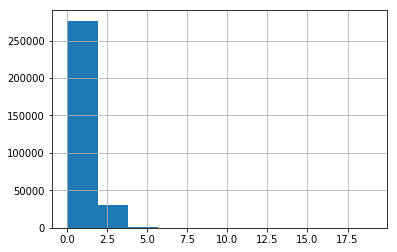

In [3]:
pdf_data["CNT_CHILDREN"].hist()
plt.show()

In [4]:
pdf_data["CNT_CHILDREN"].describe()

count    307511.0000
mean     0.4171     
std      0.7221     
min      0.0000     
25%      0.0000     
50%      0.0000     
75%      1.0000     
max      19.0000    
Name: CNT_CHILDREN, dtype: float64

In [5]:
# find bounded range
min_x = pdf_data["CNT_CHILDREN"].min()
max_x = pdf_data["CNT_CHILDREN"].max()
print("Min: {}, Max: {}".format(min_x, max_x))

Min: 0, Max: 19


In [6]:
# extracting histogram
n_bins = 10
hist_all = np.histogram(pdf_data["CNT_CHILDREN"], range=(min_x, max_x), bins=n_bins)
hist_good = np.histogram(pdf_data.query("TARGET == 0")["CNT_CHILDREN"], range=(min_x, max_x), bins=n_bins)
hist_bad = np.histogram(pdf_data.query("TARGET == 1")["CNT_CHILDREN"], range=(min_x, max_x), bins=n_bins)

In [7]:
hist_all

(array([276490,  30466,    513,     28,      4,      3,      2,      3,
             0,      2]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]))

In [8]:
hist_good

(array([254427,  27775,    451,     22,      2,      2,      2,      3,
             0,      2]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]))

In [9]:
hist_bad

(array([22063,  2691,    62,     6,     2,     1,     0,     0,     0,
            0]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]))

In [10]:
# get total number of good and bad for normalization
total_good = hist_good[0].sum()
total_bad = hist_bad[0].sum()
print("Num good: {}, Num bad: {}".format(total_good, total_bad))

Num good: 282686, Num bad: 24825


In [11]:
s_all = pd.Series(dict(zip(hist_all[1], hist_all[0])))
s_all.rename(lambda x: "{0:.2f}".format(x), inplace=True)
s_all

0.00     276490
1.90     30466 
3.80     513   
5.70     28    
7.60     4     
9.50     3     
11.40    2     
13.30    3     
15.20    0     
17.10    2     
dtype: int64

In [12]:
s_good = pd.Series(dict(zip(hist_good[1], hist_good[0])))
s_good.rename(lambda x: "{0:.2f}".format(x), inplace=True)
s_good

0.00     254427
1.90     27775 
3.80     451   
5.70     22    
7.60     2     
9.50     2     
11.40    2     
13.30    3     
15.20    0     
17.10    2     
dtype: int64

In [13]:
s_bad = pd.Series(dict(zip(hist_bad[1], hist_bad[0])))
s_bad.rename(lambda x: "{0:.2f}".format(x), inplace=True)
s_bad

0.00     22063
1.90     2691 
3.80     62   
5.70     6    
7.60     2    
9.50     1    
11.40    0    
13.30    0    
15.20    0    
17.10    0    
dtype: int64

In [14]:
# calculate distribution of good
distr_good = s_good / total_good
distr_good

0.00     9.0003e-01
1.90     9.8254e-02
3.80     1.5954e-03
5.70     7.7825e-05
7.60     7.0750e-06
9.50     7.0750e-06
11.40    7.0750e-06
13.30    1.0612e-05
15.20    0.0000e+00
17.10    7.0750e-06
dtype: float64

In [15]:
# calculate distribution of bad
distr_bad = s_bad / total_bad
distr_bad

0.00     8.8874e-01
1.90     1.0840e-01
3.80     2.4975e-03
5.70     2.4169e-04
7.60     8.0564e-05
9.50     4.0282e-05
11.40    0.0000e+00
13.30    0.0000e+00
15.20    0.0000e+00
17.10    0.0000e+00
dtype: float64

In [16]:
# sanity checkking of normalization
distr_good.sum(), distr_bad.sum()

(1.0, 0.9999999999999999)

# Weight of evidence

$$ln(\frac{P(Good)}{P(Bad)})$$

In [17]:
# getting denominator not equal zeros
idx_filtered = distr_bad[distr_bad != 0].index
idx_filtered

Index(['0.00', '1.90', '3.80', '5.70', '7.60', '9.50'], dtype='object')

In [18]:
woe = np.log(distr_good[idx_filtered] / distr_bad[idx_filtered])
woe.to_frame("WoE")

,WoE
0.00,0.0126
1.90,-0.0983
3.80,-0.4482
5.70,-1.1332
7.60,-2.4325
9.50,-1.7393


In [19]:
# equivalent equation
woe = np.log(distr_good[idx_filtered]) - np.log(distr_bad[idx_filtered])
woe.to_frame("WoE")

,WoE
0.00,0.0126
1.90,-0.0983
3.80,-0.4482
5.70,-1.1332
7.60,-2.4325
9.50,-1.7393


# Information value

$$\sum(P(Good) - P(Bad)) * ln(\frac{P(Good)}{P(Bad)})$$

In [20]:
iv = ((distr_good[idx_filtered] - distr_bad[idx_filtered]) * woe).sum()
iv

0.001965925751291937

# Plot results

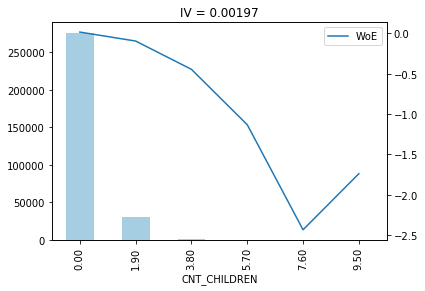

In [21]:
ax01 = s_all[idx_filtered].plot(kind="bar", colormap="Paired")
ax01.set_xlabel("CNT_CHILDREN")

# 
ax02 = ax01.twinx()  # instantiate a second axes that shares the same x-axis
woe.to_frame("WoE").plot(kind="line", ax=ax02, legend=True)

# 
plt.title("IV = {0:.5f}".format(iv))
plt.show()

# Putting all together

In [22]:
def calc_woe_and_iv(pdf_input, attr_name, n_bins=10, wanna_plot=False):
    # find bounded range
    min_x = pdf_data[attr_name].min()
    max_x = pdf_data[attr_name].max()
    print("Min: {}, Max: {}".format(min_x, max_x))
    
    # extracting histogram    
    hist_all = np.histogram(pdf_data[attr_name], range=(min_x, max_x), bins=n_bins)
    hist_good = np.histogram(pdf_data.query("TARGET == 0")[attr_name], range=(min_x, max_x), bins=n_bins)
    hist_bad = np.histogram(pdf_data.query("TARGET == 1")[attr_name], range=(min_x, max_x), bins=n_bins)
    
    # get total number of good and bad for normalization
    total_good = hist_good[0].sum()
    total_bad = hist_bad[0].sum()
    print("Num good: {}, Num bad: {}".format(total_good, total_bad))
    
    # convert histogram to series
    s_all = pd.Series(dict(zip(hist_all[1], hist_all[0])))
    s_all.rename(lambda x: "{0:.2f}".format(x), inplace=True)
    
    s_good = pd.Series(dict(zip(hist_good[1], hist_good[0])))
    s_good.rename(lambda x: "{0:.2f}".format(x), inplace=True)
    
    s_bad = pd.Series(dict(zip(hist_bad[1], hist_bad[0])))
    s_bad.rename(lambda x: "{0:.2f}".format(x), inplace=True)
    
    # calculate distribution of good/bad
    distr_good = s_good / total_good
    distr_bad = s_bad / total_bad
    
    # getting denominator indices not equal zeros
    idx_filtered = distr_bad[(distr_bad != 0) & (np.isfinite(distr_bad) & (distr_bad > 1e-04))].index
    
    # calculate woe
    woe = np.log(distr_good[idx_filtered]) - np.log(distr_bad[idx_filtered])
    
    # calculate iv
    iv = ((distr_good[idx_filtered] - distr_bad[idx_filtered]) * woe).sum()
    
    # plot (optional)
    if wanna_plot:
        ax01 = s_all[idx_filtered].plot(kind="bar", colormap="Paired")
        ax01.set_xlabel(attr_name)

        # 
        ax02 = ax01.twinx()  # instantiate a second axes that shares the same x-axis
        woe.to_frame("WoE").plot(kind="line", ax=ax02, legend=True)

        # 
        plt.title("IV = {0:.5f}".format(iv))
        plt.legend(loc="best")
        plt.show()
    
    return woe, iv

In [23]:
woe, iv = calc_woe_and_iv(pdf_data, "CNT_CHILDREN", n_bins=10, wanna_plot=False)
print("-- WoE")
display(woe)

print("-- IV: {}".format(iv))

Min: 0, Max: 19
Num good: 282686, Num bad: 24825
-- WoE


0.00    0.0126
1.90   -0.0983
3.80   -0.4482
5.70   -1.1332
dtype: float64

-- IV: 0.0017294067355007603


Min: 0, Max: 19
Num good: 282686, Num bad: 24825


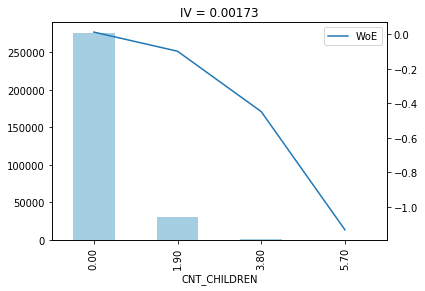

-- WoE


0.00    0.0126
1.90   -0.0983
3.80   -0.4482
5.70   -1.1332
dtype: float64

-- IV: 0.0017294067355007603


In [24]:
woe, iv = calc_woe_and_iv(pdf_data, "CNT_CHILDREN", n_bins=10, wanna_plot=True)
print("-- WoE")
display(woe)

print("-- IV: {}".format(iv))

Min: 45000.0, Max: 4050000.0
Num good: 282686, Num bad: 24825


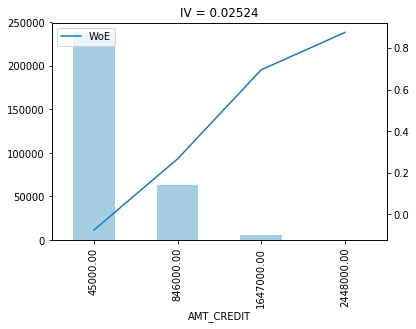

-- WoE


45000.00     -0.0752
846000.00     0.2666
1647000.00    0.6945
2448000.00    0.8739
dtype: float64

-- IV: 0.02523866785994027


In [25]:
woe, iv = calc_woe_and_iv(pdf_data, "AMT_CREDIT", n_bins=5, wanna_plot=True)
print("-- WoE")
display(woe)

print("-- IV: {}".format(iv))